# Classification 01 - Linear classification methods

#### Josep Fortiana 2019-10-23

This laboratory is almost entirely devoted to linear classification methods, plus two exceptions, Quadratic discriminant and the $k$-Nearest Neighbours method, at the end of the notebook.

Linear methods of classification are those where the assignation criterion is based on values of a linear combination of the predictor variables, or several such combinations when the number $g$ of classes is greater than $2$. 

Classification methods in general have a geometrical description as a partition of the predictor space (the space whose coordinates are the predictor variables) into two or more regions, one for each class. In linear methods separation is by one or more hyperplanes.

# A. Linear classification by least squares

In principle a linear regression by least squares is not an adequate classification method to obtain a hyperplane to separate two classes, or to predict class labels when there are more than two classes.

However methodologically unsound it may seem and, as a matter of fact, it is indeed, we can define, in binary classification problems, a numerical response with two conventional values, for instance 0/1, or (-1)/(+1), or in multi-class classification problems, we can define a vector response with as many 0/1 indicator variables as the number $g$ of classes, all of them but one set to $0$, and the remaining one set to $1$, _(one-hot coding),_ fit a linear model in the binary problem, or $g$ parallel linear models in the multi-class problem and then assess the results.

Even though results need adaptation or reinterpretation, as regression predicted values are not restricted to the discrete set of values with which the training set has been prepared, often results are surprisingly acceptable, especially when the problem is close to being linearly seeparable.

## A1. `wine` data

`wine` data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

They can be found in the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/), which hosts many documented data sets to be used as benchmarks in evaluating Machine Learning methods and algorithms. Alternatively, should the link be broken, you can find the `.csv` file in the Virtual Campus. The following description is taken from the UCI website:

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set.

The attributes are:

01. Alcohol

02. Malic acid

03. Ash

04. Alcalinity of ash

05. Magnesium

06. Total phenols

07. Flavonoids

08. Nonflavonoid phenols

09. Proanthocyanins

10. Color intensity

11. Hue

12. OD280/OD315 of diluted wines

13. Proline


In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.

Since the `.csv` file has no first row with variable names we must set `header=FALSE` in the `read.csv` call (see default values for the optional parameters in the help). 

The casting `as.factor()` command has the purpose of conveying the fact that this variable is qualitative, so the R interpreter can use it as such.

In [1]:
wine.url<-"http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
#wine<-read.csv(wine.url,header=FALSE)
wine<-read.csv("wine.csv",header=FALSE)
colnames(wine)<-c("Type","Alcohol","Malic","Ash", "Alcalinity","Magnesium","Phenols","Flavonoids",
                  "Nonflavonoids","Proanthocyanins","Color","Hue", "Dilution","Proline")
wine$Type <- as.factor(wine$Type)

In [2]:
str(wine$Type)
levels(wine$Type)
table(wine$Type)

 Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...


[1] "1" "2" "3"


 1  2  3 
59 71 48 

Split the dataset in two subsets, for cross-validation, `train` with about $60\%$ of data, and  `test` with the remaining $\approx40\%$.

In [3]:
n<-nrow(wine)
ntrain<-ceiling(0.6*n)
ntest<-n-ntrain
set.seed(24025)  # some arbitrary value, for the sake of reproducible results
Itrain<-sample(1:n,ntrain,replace=FALSE)
wine.train<-wine[Itrain,]
wine.test<-wine[-Itrain,]

Prepare a `Y` vector response with the one-hot coding of the three levels-valued factor response `wine$Type`.

Create  `wine2`, a new `data.frame` appending the new three binary variables and discarding the old factor.

In [4]:
y<-wine$Type
Y<-cbind((y=="1"),(y=="2"),(y=="3"))
colnames(Y)<-c("Y1","Y2","Y3")
wine2<-data.frame(wine[,-1],Y)
wine2.train<-wine2[Itrain,]
wine2.test<-wine2[-Itrain,]

Fit three parallel linear models with the same set of predictors:

In [5]:
wine2.lm1<-lm(cbind(Y1,Y2,Y3)~.,data=wine2.train)
summary(wine2.lm1)

Response Y1 :

Call:
lm(formula = Y1 ~ Alcohol + Malic + Ash + Alcalinity + Magnesium + 
    Phenols + Flavonoids + Nonflavonoids + Proanthocyanins + 
    Color + Hue + Dilution + Proline, data = wine2.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41580 -0.08969 -0.01396  0.10051  0.35342 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.704e+00  4.499e-01  -3.788 0.000269 ***
Alcohol          7.136e-02  3.362e-02   2.122 0.036453 *  
Malic            1.048e-02  1.914e-02   0.548 0.585335    
Ash              4.036e-01  8.996e-02   4.486 2.07e-05 ***
Alcalinity      -3.682e-02  7.228e-03  -5.094 1.83e-06 ***
Magnesium        1.024e-03  1.424e-03   0.719 0.473710    
Phenols         -1.507e-01  6.150e-02  -2.451 0.016120 *  
Flavonoids       2.167e-01  5.072e-02   4.273 4.66e-05 ***
Nonflavonoids    1.843e-01  1.881e-01   0.980 0.329826    
Proanthocyanins -2.803e-02  4.328e-02  -0.648 0.518823    
Color           -5.030e

We can further analyze the model(s), for instance selecting an optimal predictor subset. This is not so easy as in a single `lm`, as predictors can, and in general do, have different predictive power for each binary response.

In [6]:
#
#
#

On the other hand, `predict.lm()` works here as expected. We prepare the test `data.frame` for prediction, by removing the response columns and keeping them aside for later use in assessing predictions:

In [7]:
wine2.test.to.predict<-wine2.test[,-(14:16)]

Run prediction. Check the structure of the resulting `Yhat`.
Indeed `Yhat` is a matrix with 3 columns.

Observe that each row in `Yhat` adds up to 1 (Can you explain why?). 

In [8]:
Yhat<-predict(wine2.lm1,newdata=wine2.test.to.predict)
str(Yhat)
Yhat.sums<-as.numeric(apply(Yhat,1,sum))
t(Yhat.sums)

 num [1:71, 1:3] 1.256 0.65 1.158 0.915 0.921 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:71] "4" "5" "8" "9" ...
  ..$ : chr [1:3] "Y1" "Y2" "Y3"


1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Entries in `Yhat` are not $0$'s or $1$'s as entries in $Y$; they even do not belong to the $(0,1)$ interval, which is a cause of ambiguity in classifications. See the first $5$ rown in `Yhat

This is a reason why this method is not a usual one in classification. Anyway we stick to it as an exercise.

In [9]:
round(Yhat[1:5,],3)

,Y1,Y2,Y3
4,1.256,-0.391,0.135
5,0.650,0.279,0.071
8,1.158,-0.181,0.023
9,0.915,0.083,0.003
10,0.921,0.056,0.023


There are several possibilities to force `Yhat` into a matrix with a _one-hot_ coding which can be directly read as a classification prediction.

What we will do is to assign each individual to the class (column) of the maximum value in the row. 

We compute the `Yhat.ind` matrix with three columns, which has in each $i$-th row the three indicators, for $j=1,2,3$, of `Yhat[i,j]` equalling the maximum in `Yhat[i,]`:

In [10]:
Yhat.max<-apply(Yhat,1,max)
Yhat.ind<-1*cbind(Yhat[,1]==Yhat.max,Yhat[,2]==Yhat.max,Yhat[,3]==Yhat.max)

### Confusion matrix

This is a general object in visualizing the quality of a classification algorithm. The _confusion matrix_ for a classification problem with $g$ classes is a matrix $C$ with $g$ rows and $g$ columns.  

The classification algorithm is applied to a test data subset in which the true class of each sample is known. In each $i$-th row of $C$ the entry in the $j$-th column is the number of samples whose true class is $i$ which the algorithm has assigned to the $j$-th class. 

A perfect classification would yield a diagonal confusion matrix (with non-null entris oly on the principal diagonal). 

Measures of quality can be derived from the proportion of off-diagonal entries, either row-wise or globally. For instance the sum of all off-diagonal entries divided by the total sample size is an estimate of the probability of misclassification.

A computation of the confusion matrix by means of a matrix product. (NB: possible here because both `Y`and `Yhat` are three column matrices with zeros and ones!):

In [11]:
Y.test<-Y[-Itrain,]
C<-t(Y.test)%*%Yhat.ind
dimnames(C)<-list(True=c(1,2,3),Predicted=c(1,2,3))
C

1,2,3
21,0,0
1,31,0
0,0,18


Another procedure which, by the way, is more generalizable to other classification methods:

In [12]:
y.test<-y[-Itrain]
yhat<-as.factor(apply(Yhat,1,which.max))
C<-table("True"=y.test,"Predicted"=yhat)
C

    Predicted
True  1  2  3
   1 21  0  0
   2  1 31  0
   3  0  0 18

# B. Linear classification by logistic regression

As explained in the theory slides, logistic regression is a statistical model, an instance of a Generalized Linear Model (GLM) which is usually fitted by Maximum Likelihood.

Its R implementation is in the `glm()` function from the `stats` package (loaded by default). Syntax is similar to that of `lm()`. See details in the help, which you can invoke by typing `?glm`.

## B1. `SAheart` data

From the `ElemStatLearn` package, `SAheart` is a data frame with 462 observations on the following 10 variables.

01. `sbp`: systolic blood pressure.

02. `tobacco`: cumulative tobacco (kg).

03. `ldl`: low density lipoprotein cholesterol.

04. `adiposity`: a numeric vector.

05. `famhist`: family history of heart disease, a factor with levels `Absent`, `Present`.

06. `typea`: type-A behavior.

07. `obesity`: a numeric vector.

08. `alcohol`: current alcohol consumption.

09. `age`: age at onset

10. `chd`: response, coronary heart disease

##### Details

A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in Rousseauw et al, 1983, South African Medical Journal.

In [13]:
#install.packages("ElemStatLearn",dependencies=TRUE,repos="https://cloud.r-project.org")
require(ElemStatLearn)
data(SAheart)
str(SAheart)

Loading required package: ElemStatLearn


'data.frame':	462 obs. of  10 variables:
 $ sbp      : int  160 144 118 170 134 132 142 114 114 132 ...
 $ tobacco  : num  12 0.01 0.08 7.5 13.6 6.2 4.05 4.08 0 0 ...
 $ ldl      : num  5.73 4.41 3.48 6.41 3.5 6.47 3.38 4.59 3.83 5.8 ...
 $ adiposity: num  23.1 28.6 32.3 38 27.8 ...
 $ famhist  : Factor w/ 2 levels "Absent","Present": 2 1 2 2 2 2 1 2 2 2 ...
 $ typea    : int  49 55 52 51 60 62 59 62 49 69 ...
 $ obesity  : num  25.3 28.9 29.1 32 26 ...
 $ alcohol  : num  97.2 2.06 3.81 24.26 57.34 ...
 $ age      : int  52 63 46 58 49 45 38 58 29 53 ...
 $ chd      : int  1 1 0 1 1 0 0 1 0 1 ...


The response `chd` is coded as an integer-valued variable with $0/1$ values. For some classification procedures we should recode it as a factor with two levels, as we did with the `wine` data. Logistic regression does not require this step, as it will process correctly with the current coding. However keep in mind this feature before applying other classification methods  on this dataset (see below).

Split the dataset into a pair $(\text{train},\text{test})$ of subsets.

In [14]:
set.seed(24025)
n<-nrow(SAheart)
ntrain<-ceiling(0.60*n)
Itrain<-sample(1:n,ntrain,replace=FALSE)
n<-nrow(SAheart)
ntrain<-ceiling(0.60*n)
Itrain<-sample(1:n,ntrain,replace=FALSE)
SAheart.train<-SAheart[Itrain,]
SAheart.test<-SAheart[-Itrain,]

Before applying logistic regression, we can try to classify `SAheart` data by the least squares method and estimate the misclassification probability.

In [15]:
#
#
#

Syntax for `glm`

In [16]:
SAheart.logit1<-glm(chd~.,data=SAheart.train,family=binomial)

In [17]:
summary(SAheart.logit1)


Call:
glm(formula = chd ~ ., family = binomial, data = SAheart.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1308  -0.7738  -0.4384   0.8366   2.2841  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -7.252428   1.769751  -4.098 4.17e-05 ***
sbp             0.008629   0.007979   1.082  0.27947    
tobacco         0.111020   0.035591   3.119  0.00181 ** 
ldl             0.263452   0.084697   3.111  0.00187 ** 
adiposity      -0.015090   0.037507  -0.402  0.68744    
famhistPresent  0.830130   0.301427   2.754  0.00589 ** 
typea           0.032812   0.016411   1.999  0.04557 *  
obesity         0.004643   0.055596   0.084  0.93344    
alcohol        -0.007579   0.006766  -1.120  0.26264    
age             0.046532   0.015339   3.033  0.00242 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 368.59  on 277  degrees of f

The summary of `glm()` is similar to that of `lm()`, including the $p$-values giving some indication about the coefficients significance.

The (Residual) `Deviance` is a quantity equivalent to the Residual Sum of Squares in a `lm()`.

Another consequence of the fact that `glm()` fits a statistical model is the possibility of predictor selection by means of a `step()` functions just as in `lm()`. For instance:

In [18]:
step(SAheart.logit1)

Start:  AIC=300.94
chd ~ sbp + tobacco + ldl + adiposity + famhist + typea + obesity + 
    alcohol + age

            Df Deviance    AIC
- obesity    1   280.95 298.95
- adiposity  1   281.10 299.10
- sbp        1   282.12 300.12
- alcohol    1   282.25 300.25
<none>           280.94 300.94
- typea      1   285.11 303.11
- famhist    1   288.59 306.59
- age        1   290.52 308.52
- ldl        1   291.40 309.40
- tobacco    1   291.92 309.92

Step:  AIC=298.95
chd ~ sbp + tobacco + ldl + adiposity + famhist + typea + alcohol + 
    age

            Df Deviance    AIC
- adiposity  1   281.22 297.22
- sbp        1   282.13 298.13
- alcohol    1   282.29 298.29
<none>           280.95 298.95
- typea      1   285.29 301.29
- famhist    1   288.59 304.59
- ldl        1   291.42 307.42
- age        1   291.47 307.47
- tobacco    1   291.92 307.92

Step:  AIC=297.22
chd ~ sbp + tobacco + ldl + famhist + typea + alcohol + age

          Df Deviance    AIC
- sbp      1   282.24 296.24
- alcoh


Call:  glm(formula = chd ~ tobacco + ldl + famhist + typea + age, family = binomial, 
    data = SAheart.train)

Coefficients:
   (Intercept)         tobacco             ldl  famhistPresent           typea  
      -6.35777         0.10012         0.26250         0.80533         0.03191  
           age  
       0.04651  

Degrees of Freedom: 277 Total (i.e. Null);  272 Residual
Null Deviance:	    368.6 
Residual Deviance: 283.3 	AIC: 295.3

Selects a model:

In [19]:
sel.model<-chd ~ tobacco + ldl + famhist + typea + age

where `sbp`, `adiposity`, `obesity`, `alcohol` have been removed from the list of predictors. We can fit the selected model:

In [20]:
SAheart.logit2<-glm(sel.model,data=SAheart.train,family=binomial)
summary(SAheart.logit2)


Call:
glm(formula = sel.model, family = binomial, data = SAheart.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0396  -0.7822  -0.4256   0.8711   2.2811  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -6.35777    1.18171  -5.380 7.44e-08 ***
tobacco         0.10012    0.03415   2.932 0.003371 ** 
ldl             0.26250    0.07817   3.358 0.000786 ***
famhistPresent  0.80533    0.29788   2.704 0.006860 ** 
typea           0.03191    0.01605   1.989 0.046731 *  
age             0.04651    0.01315   3.537 0.000405 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 368.59  on 277  degrees of freedom
Residual deviance: 283.27  on 272  degrees of freedom
AIC: 295.27

Number of Fisher Scoring iterations: 5


Syntax of `predict.glm()` to compute probabilities of belonging to each class.

Actually probabilities of the binary $0/1$  response taking the value $1$ (here `chd=1`).

In [21]:
SAheart.pred<-predict(SAheart.logit2,newdata=SAheart.test[,c(2,3,5,6,9)],type="response")
str(SAheart.pred)

 Named num [1:184] 0.7154 0.1955 0.5264 0.0265 0.1821 ...
 - attr(*, "names")= chr [1:184] "5" "7" "11" "14" ...


If a _crisp_ assignation to `0` or `1` is required, one has to decide a cut point, for instance $L=0.5$ (this value is not mandatory, it can depend on the model or on the _a priori_ probabilities) and classify as $0$ or $1$ depending on whether the probability is higher or lower than this threshold:

Confusion matrix for this classification:

In [22]:
SAheart.pred.crisp<-1*(SAheart.pred>=0.5)
C<-table("True"=SAheart.test$chd,"Predicted"=SAheart.pred.crisp)
C

    Predicted
True  0  1
   0 99 30
   1 28 27

#### Some internal details about computations in logistic regression

In the slides `Detalles.Reg.Logistica.slides.esp.pdf` you can find an explanation of the logistic regression model and of the numerical procedure used to obtain the maximum likelihood estimates of the model coefficients. 

It is a variant of the Newton-Raphson optimization method, which results in an iterative computation by successive approximations,  where each step is equivalent to a Weighted Least Squares fit, with the weight for each sample is updated for each step. The procedure is called IWLS or IRLS, meaning Iteratively (Re)Weighted Least Squares. 

In the `IWLS.r` script you can see a simple implementation of this algorithm.

The `separation.txt` data shows a case of non-existence of a Maximum Likelihood estimate for the logistic regression models. Try these data with the `IWLS()`  function in `IWLS.r` and with the `glm()` function.

In [23]:
#
#
#

## B2. `Default` dataset

From the `ISLR` package. A simulated data set containing information on ten thousand customers. The aim here is to predict which customers will default on their credit card debt.

A data frame with 10000 observations on the following 4 variables.

01. `default`: A factor with levels `No` and `Yes` indicating whether the customer defaulted on their debt

02. `student`: A factor with levels `No` and `Yes` indicating whether the customer is a student

03. `balance`: The average balance that the customer has remaining on their credit card after making their monthly payment

04. `income`: Income of customer


In [24]:
#install.packages("ISLR",dependencies=TRUE,repos="https://cloud.r-project.org")
require(ISLR)
data(Default)
str(Default)

Loading required package: ISLR


'data.frame':	10000 obs. of  4 variables:
 $ default: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ student: Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ balance: num  730 817 1074 529 786 ...
 $ income : num  44362 12106 31767 35704 38463 ...


### Fitting the logistic regression model

In [25]:
Default.logit1<-glm(default~balance,family=binomial,data=Default)
summary(Default.logit1)
round(coefficients(Default.logit1),4)


Call:
glm(formula = default ~ balance, family = binomial, data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2697  -0.1465  -0.0589  -0.0221   3.7589  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


(Intercept)     balance 
   -10.6513      0.0055

#### Making prediction for new cases

The output of `predict()`is to be interpreted as a probability of `Default=Yes`

In [26]:
round(predict(Default.logit1,newdata=data.frame(balance=1000),type="response"),5)

1 
0.00575

A larger balance makes default more likely.

In [27]:
round(predict(Default.logit1,newdata=data.frame(balance=2000),type="response"),5)

1 
0.58577

#### Logistic regression with a categorical predictor:  `student`

In [28]:
Default.logit2<-glm(default~student,family=binomial,data=Default)
summary(Default.logit2)
round(coefficients(Default.logit2),4)


Call:
glm(formula = default ~ student, family = binomial, data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2970  -0.2970  -0.2434  -0.2434   2.6585  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.50413    0.07071  -49.55  < 2e-16 ***
studentYes   0.40489    0.11502    3.52 0.000431 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 2908.7  on 9998  degrees of freedom
AIC: 2912.7

Number of Fisher Scoring iterations: 6


(Intercept)  studentYes 
    -3.5041      0.4049

In [29]:
head(model.matrix(Default.logit2))

(Intercept),studentYes
1,0
1,1
1,0
1,0
1,0
1,1


#### Logistic regression with several predictors

In [30]:
Default.logit3<-glm(default~.,family=binomial,data=Default)
summary(Default.logit3)


Call:
glm(formula = default ~ ., family = binomial, data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4691  -0.1418  -0.0557  -0.0203   3.7383  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
studentYes  -6.468e-01  2.363e-01  -2.738  0.00619 ** 
balance      5.737e-03  2.319e-04  24.738  < 2e-16 ***
income       3.033e-06  8.203e-06   0.370  0.71152    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8


#### Using `step()` to select an optimal predictor subset

In [31]:
step(Default.logit3)

Start:  AIC=1579.54
default ~ student + balance + income

          Df Deviance    AIC
- income   1   1571.7 1577.7
<none>         1571.5 1579.5
- student  1   1579.0 1585.0
- balance  1   2907.5 2913.5

Step:  AIC=1577.68
default ~ student + balance

          Df Deviance    AIC
<none>         1571.7 1577.7
- student  1   1596.5 1600.5
- balance  1   2908.7 2912.7



Call:  glm(formula = default ~ student + balance, family = binomial, 
    data = Default)

Coefficients:
(Intercept)   studentYes      balance  
 -10.749496    -0.714878     0.005738  

Degrees of Freedom: 9999 Total (i.e. Null);  9997 Residual
Null Deviance:	    2921 
Residual Deviance: 1572 	AIC: 1578

# C. Fisher linear discriminant

Fisher's discriminant is the oldest method of classification from several predictor variables. It was introduced by Ronald A. Fisher (1936) _"The Use of Multiple Measurements in Taxonomic Problems"._ Also this article features, as an illustration, the famous _Iris flowers_ dataset for a problem of classification into three classes, _"Iris setosa",_ _"Iris virginica",_ and _"Iris versicolor",_ from four numerical variables, _"Sepal width",_ _"Sepal length",_ _"Petal width",_ _"Petal length"._

As with all linear discriminant methods, it is more successful when the distribution of data in the predictor space is given by a mixture of Gaussian (multivariate normal) distributions. Geometrically when the set of individuals-points in each class  has an ellipsoidal shape around its centroid, its mean. Actually a probabilistic derivation of Fisher discriminant functions
assumes classes modelled by Gaussian distributions with a common matrix of variances and covariances (shortly covariances matrix). There is a purely geometrical derivation in terms of distances between individuals. A nice visual explanation can be found in the blog entry [An illustrative introduction to Fisher's Linear Discriminant](https://sthalles.github.io/fisher-linear-discriminant/).

Among the many implementations of Fisher's linear discriminant we can use the `lda` function is the `MASS` package.

## C1. `Iris` dataset

The default `datasets` package in the standard R distribution contains this dataset in two formats: `iris` and `iris3`. We use here the first version, a `data.frame` with the five variables:

 01. `Sepal.Length`: Continuous numerical. 
 02. `Sepal.Width`: Continuous numerical. 
 03. `Petal.Length`: Continuous numerical. 
 04. `Petal.Width`: Continuous numerical. 
 05. `Species`: Factor with three levels: `'setosa'` `'versicolor'` `'virginica'`.

In [32]:
data(iris)
str(iris)
levels(iris$Species)
table(iris$Species)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


[1] "setosa"     "versicolor" "virginica"


    setosa versicolor  virginica 
        50         50         50 

#### Prepare two subsets for training and testing

In [33]:
n<-nrow(iris)
ntrain<-ceiling(0.6*n)
set.seed(24025)         # An arbitrary value, fixed for the sake of reproducibility of results
Itrain<-sample(1:n,ntrain,replace=FALSE)
iris.train<-iris[Itrain,]
iris.test<-iris[-Itrain,]

#### Evaluate the linear discriminant

In [34]:
require(MASS)
iris.lda<-lda(Species~.,data=iris.train)
iris.pred<-predict(iris.lda,newdata=iris.test)
C<-table("True"=iris.test$Species,"Predicted"=iris.pred$class)
C

Loading required package: MASS


            Predicted
True         setosa versicolor virginica
  setosa         19          0         0
  versicolor      0         18         1
  virginica       0          0        22

There is a `plot.lda` method for objects of class `lda` (the output of the `lda()` function). See the help file.

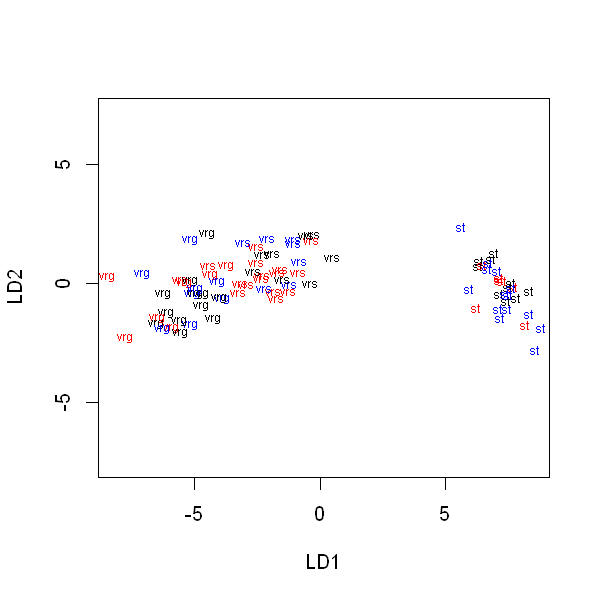

In [35]:
options(repr.plot.width=5, repr.plot.height=5)
plot(iris.lda,cex=0.6,col=c("red","blue","black"),abbrev=2)

There is an `ldahist` function, to visualize distributions of individual predictor variables across groups. It can plot either histograms, or density estimates (kernel smoothing, see the help of the R `density` function), or both. Some trial and error fine tuning of optional parameters is advisable. For instance when plotting density estimates, it may happen that the bandwidth smoothing parameter `width` default value computation crashes and it must be set by hand. Other graphical parameters are difficult (or impossible, I don't know which) to set, hence this function has a limited usefulness.

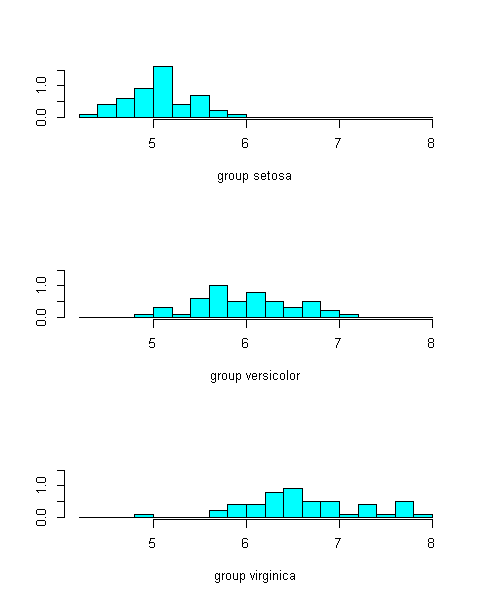

In [36]:
options(repr.plot.width=4, repr.plot.height=5)
ldahist(iris$Sepal.Length,iris$Species,type="histogram")  # this is the default

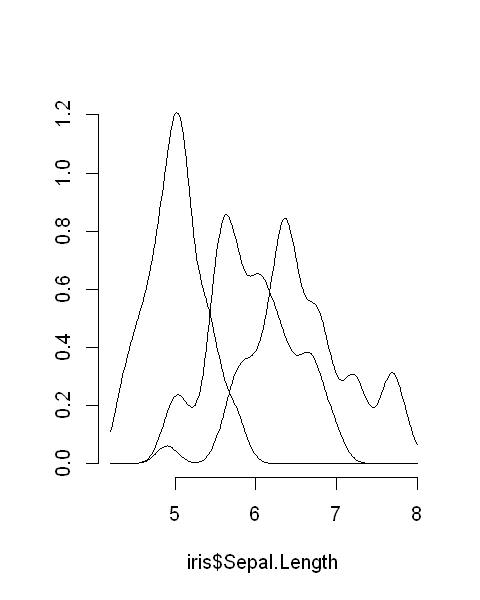

In [37]:
ldahist(iris$Sepal.Length,iris$Species,type="density",lwd=3)

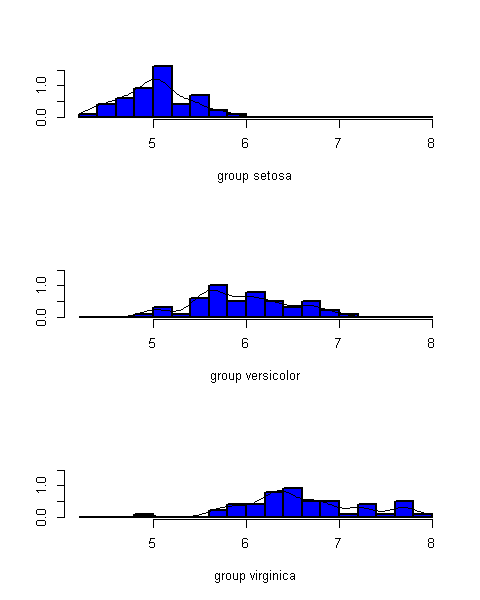

In [38]:
ldahist(iris$Sepal.Length,iris$Species,type="both",lwd=2,col="blue")

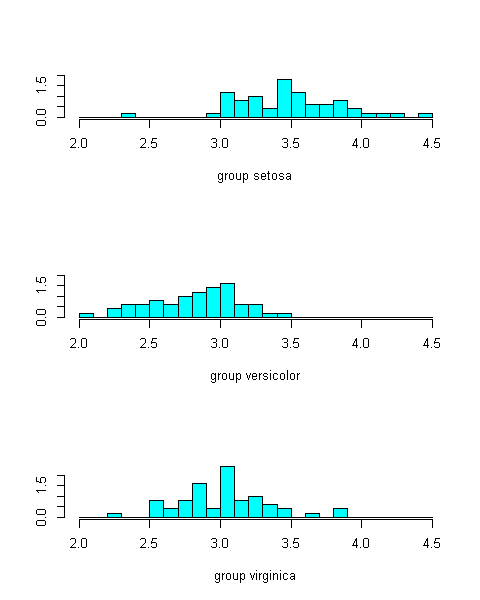

In [39]:
ldahist(iris$Sepal.Width,iris$Species)

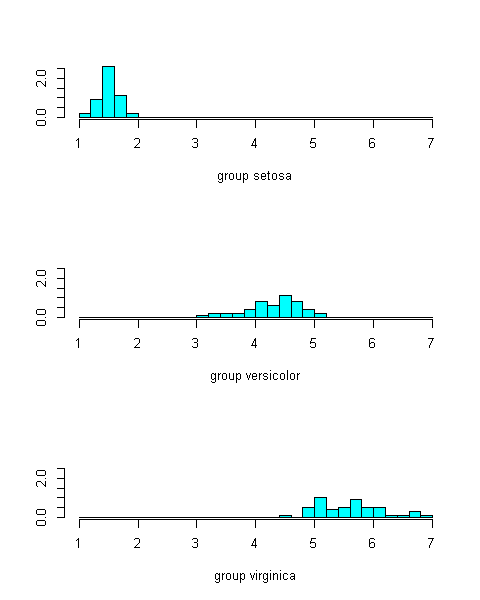

In [40]:
ldahist(iris$Petal.Length,iris$Species)

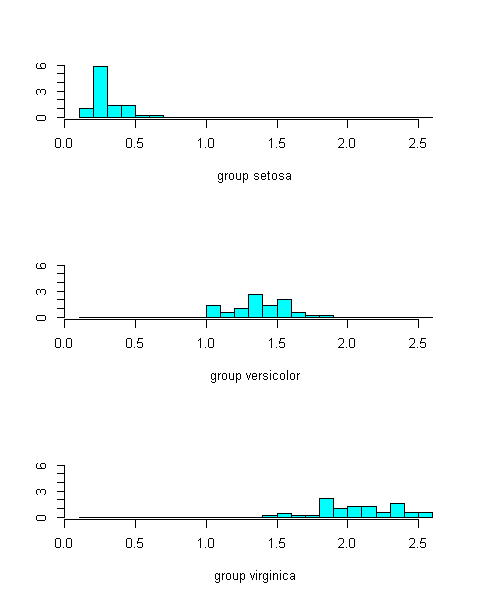

In [41]:
ldahist(iris$Petal.Width,iris$Species)

#### Built-in _leave-one-out_ cross-validation

In [42]:
iris.lda.CV<-lda(Species~.,data=iris, CV=TRUE)
#str(iris.lda.CV)
C<-table("True"=iris$Species,"LOO Predicted"=iris.lda.CV$class)
C

            LOO Predicted
True         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          1        49

## C2. `SAheart` dataset

As we saw above, originally the response variable `chd` is numerically coded with $0/1$ values. This is not an obstacle for logistic regression or with `lda`. For some other methods, it will be an issue. For instance the Clasification and Regression Trees function `rpart()` requires the response variable in a classification to be a factor, otherwise it will perform a regression.

Similarly,  the `glm()` function we use to fit logistic regression, is capable of dealing with qualitative predictor variables, by constructing a design matrix with the appropriate indicator variables. In this dataset, one of the risk factors, `famhist`, appears as a factor with two levels. It might be necessary to recode it either as a numeric variable or to obtain the `model.matrix` by a dummy call to `lm()`or `glm()`.

In any case to be on the safe side, better check capabilities of any given function before blindly using it.

In [43]:
SAheart.lda1<-lda(chd~.,data=SAheart.train)

In [44]:
SAheart.pred<-predict(SAheart.lda1,newdata=SAheart.test)
C<-table("True"=SAheart.test$chd,"Predicted"=SAheart.pred$class)
C

    Predicted
True  0  1
   0 97 32
   1 27 28

# D. Quadratic discriminant

Quadratic discriminant can be considered as an slight extension of Fisher's linear discriminant. Thus it is reasonable to study it here even though it is not linear. It has a probabilistic derivation like that of Fisher's LD, relaxing the assumption that groups are modelled as Gaussians with a common covariances matrix to Gaussians, each with its own covariances matrix.

Implemented in the `qda()` function, `MASS` package.

## D1. `SAheart` dataset

In [45]:
SAheart.qda1<-qda(chd~.,data=SAheart.train)
SAheart.pred<-predict(SAheart.qda1,newdata=SAheart.test)
C<-table("True"=SAheart.test$chd,"Predicted"=SAheart.pred$class)
C

    Predicted
True   0   1
   0 102  27
   1  28  27

## D2. `Smarket` dataset

This is an S&P Stock Market Data set. Daily percentage returns for the S&P 500 stock index between 2001 and 2005.
Contained in the `ISLR` package as a `data.frame` with 1250 observations on the following 9 variables.

01. `Year`: The year that the observation was recorded

02. `Lag1`: Percentage return for previous day

03. `Lag2`: Percentage return for 2 days previous

04. `Lag3`: Percentage return for 3 days previous

05. `Lag4`: Percentage return for 4 days previous

06. `Lag5`: Percentage return for 5 days previous

07. `Volume`: Volume of shares traded (number of daily shares traded in billions)

08. `Today`: Percentage return for today

09. `Direction`: A factor with levels `Down` and `Up` indicating whether the market had a positive or negative return on a given day

In [46]:
require(ISLR)
data(Smarket)
str(Smarket)

'data.frame':	1250 obs. of  9 variables:
 $ Year     : num  2001 2001 2001 2001 2001 ...
 $ Lag1     : num  0.381 0.959 1.032 -0.623 0.614 ...
 $ Lag2     : num  -0.192 0.381 0.959 1.032 -0.623 ...
 $ Lag3     : num  -2.624 -0.192 0.381 0.959 1.032 ...
 $ Lag4     : num  -1.055 -2.624 -0.192 0.381 0.959 ...
 $ Lag5     : num  5.01 -1.055 -2.624 -0.192 0.381 ...
 $ Volume   : num  1.19 1.3 1.41 1.28 1.21 ...
 $ Today    : num  0.959 1.032 -0.623 0.614 0.213 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 2 2 1 2 2 2 1 2 2 2 ...


In [47]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [48]:
round(cor(as.matrix(Smarket[,-9])),2)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00,0.03,0.03,0.03,0.04,0.03,0.54,0.03
Lag1,0.03,1.00,-0.03,-0.01,0.00,-0.01,0.04,-0.03
Lag2,0.03,-0.03,1.00,-0.03,-0.01,0.00,-0.04,-0.01
Lag3,0.03,-0.01,-0.03,1.00,-0.02,-0.02,-0.04,0.00
Lag4,0.04,0.00,-0.01,-0.02,1.00,-0.03,-0.05,-0.01
Lag5,0.03,-0.01,0.00,-0.02,-0.03,1.00,-0.02,-0.03
Volume,0.54,0.04,-0.04,-0.04,-0.05,-0.02,1.00,0.01
Today,0.03,-0.03,-0.01,0.00,-0.01,-0.03,0.01,1.00


## The `corrplot` package

Useful visualization of correlation matrices, especially with a large number of variables. 

See this [Vignette](https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html) and examples in the package help.

In [49]:
#install.packages("corrplot",dependencies=TRUE,repos="https://cloud.r-project.org")
require(corrplot)

Loading required package: corrplot
corrplot 0.84 loaded


In [50]:
R<-cor(Smarket[,-9])

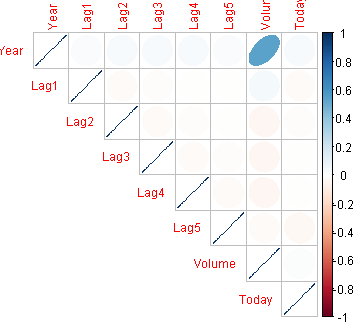

In [51]:
options(repr.plot.width=3.0, repr.plot.height=2.8)
corrplot(R, method = "ellipse",type="upper",tl.cex=0.6,cl.cex=0.6)

## Classification with `Smarket`, following Section 4.6 - Lab in the ISLR book


[Code from the ISLR book](http://faculty.marshall.usc.edu/gareth-james/ISL/Chapter%204%20Lab.txt)

### Logistic Regression

### With Fisher's linear discriminant

### Quadratic Discriminant Analysis

# E. $k$ Nearest Neighbours (k-NN) classification

This _non-linear_ method clearly does not belong in a chapter on linear classification. Nevertheless it is easy both to describe and to implement, hence a useful reference for comparison to more sophisticated method.

It requires a proximity or distance function in the predictor space, with which we evaluate the distances from a new case to be classified to each case in the learning dataset (whose class is already known). We select a positive integer $k$ (smaller than the number of cases in the learning dataset). Then the new observation is assigned to the  majority  class in the set of $k$ nearest cases in the learning dataset.

In addition to being non-linear, $k-NN$ is the _most_ opposite method to those described above, in the sense of being _local,_ that is, the prediction function is constructed just within a neighbourhood of the new case, whereas in all previous methods the classification criterion is a partition of the predictor space by a _globally defined_ hyperplane. Different methods (least squares, logistic regression, Fisher discriminant) differ in the procedure used to derive this hyperplane.

## E1. With the `wine` dataset

In [52]:
wine.url<-"http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
#wine<-read.csv(wine.url,header=FALSE)
wine<-read.csv("wine.csv",header=FALSE)
colnames(wine)<-c("Type","Alcohol","Malic","Ash", "Alcalinity","Magnesium","Phenols","Flavonoids",
                  "Nonflavonoids","Proanthocyanins","Color","Hue", "Dilution","Proline")
wine$Type <- as.factor(wine$Type)

In [53]:
str(wine$Type)
levels(wine$Type)
table(wine$Type)

 Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...


[1] "1" "2" "3"


 1  2  3 
59 71 48 

Split the dataset in two subsets, for cross-validation, `train` with about $60\%$ of data, and  `test` with the remaining $\approx40\%$.

In [54]:
n<-nrow(wine)
ntrain<-ceiling(0.6*n)
ntest<-n-ntrain
set.seed(24025)  # some arbitrary value, for the sake of reproducible results
Itrain<-sample(1:n,ntrain,replace=FALSE)
wine.train<-wine[Itrain,]
wine.test<-wine[-Itrain,]

In [55]:
Xtrain<-as.matrix(wine.train[,-1])
ytrain<-wine.train[,1]
Xtest<-as.matrix(wine.test[,-1])
ytest<-wine.test[,1]

There is an implementation of k-NN classification in the `class` package.

In [56]:
#install.packages("class",dependencies=TRUE,repos="https://cloud.r-project.org")
require(class)

Loading required package: class


#### Confusion matrix

In [57]:
k<-7
y.hat<-knn(Xtrain,Xtest,ytrain,k )
C<-table("True"=ytest,"Predicted"=y.hat)
C

    Predicted
True  1  2  3
   1 19  1  1
   2  4 18 10
   3  2 11  5

## E2. With `SMarket`, following Section 4.6 - Lab in the ISLR book

## E3. Caravan Insurance Data